In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
def calc_patches(df, num_patches=3):
    df_new = df.copy()
    threshold = max(df_new['start'])/num_patches
    df_new['patch'] = [math.floor(start/threshold) for start in df_new['start']]
    return df_new

In [8]:
PATCH_SIZE = 4
df_vocals_morning = pd.read_csv('../data/hume/processed/Cuban_vocals_morning.csv', index_col=0)
df_vocals_morning = calc_patches(df_vocals_morning,PATCH_SIZE)

df_vocals_afternoon = pd.read_csv('../data/hume/processed/Cuban_vocals_afternoon.csv', index_col=0)
df_vocals_afternoon = calc_patches(df_vocals_afternoon,PATCH_SIZE)

# df_vocals = pd.concat([df_vocals_morning, df_vocals_afternoon])

df_band_morning = pd.read_csv('../data/hume/processed/Funk_band_morning.csv', index_col=0)
df_band_morning = calc_patches(df_band_morning,PATCH_SIZE)


df_band_afternoon = pd.read_csv('../data/hume/processed/Funk_band_afternoon.csv', index_col=0)

df_rhythm_morning = pd.read_csv('../data/hume/processed/Funk_rhythm_morning.csv', index_col=0)
df_rhythm_morning = calc_patches(df_rhythm_morning,PATCH_SIZE)



df_rhythm_afternoon = pd.read_csv('../data/hume/processed/Funk_rhythm_afternoon.csv', index_col=0)

df_merged = pd.concat([pd.concat([df_vocals_morning, df_vocals_afternoon, df_band_morning,df_band_afternoon, df_rhythm_morning, df_rhythm_afternoon])])
df_merged

,anger,disgust,fear,joy,sadness,surprise,neutral,start_patch,start,patch
0,0.039957,0.114220,0.126544,0.169541,0.137182,0.147788,0.157061,0.0,0.10,0.0
1,0.037922,0.104910,0.110700,0.190294,0.127883,0.129474,0.150551,0.0,0.20,0.0
2,0.044073,0.118693,0.129124,0.167583,0.158697,0.130753,0.167633,0.0,0.30,0.0
3,0.041380,0.134487,0.140038,0.133327,0.198558,0.126955,0.179034,0.0,0.40,0.0
4,0.047777,0.118812,0.136461,0.141578,0.157510,0.128101,0.191475,0.0,0.50,0.0
...,...,...,...,...,...,...,...,...,...,...
63475,0.074321,0.149759,0.149410,0.091297,0.201079,0.097925,0.242697,140.0,8588.08,NaN
63476,0.067359,0.155635,0.145315,0.077353,0.226719,0.081795,0.271931,140.0,8588.20,NaN
63477,0.071918,0.149919,0.149765,0.091086,0.218187,0.088475,0.270641,140.0,8588.32,NaN
63478,0.063536,0.148344,0.139564,0.079959,0.225815,0.088789,0.313732,140.0,8588.40,NaN


# H1: Do we measure more flow state?

Text(0.5, 1.0, 'Mean of Flow and Non-Flow State Emotions')

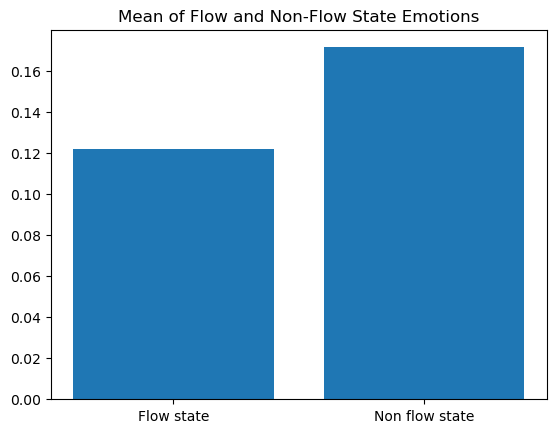

In [12]:
flow_emotions = ['joy', 'fear', 'surprise']
non_flow =['neutral', 'sadness', 'anger']

df_merged['flow'] = df_merged[flow_emotions].mean(axis=1)
df_merged['non_flow'] = df_merged[non_flow].mean(axis=1)
plt.bar(['Flow state', 'Non flow state'], [df_merged['flow'].mean(), df_merged['non_flow'].mean()])
plt.title('Mean of Flow and Non-Flow State Emotions')

In [13]:
from scipy.stats import ttest_rel

# Assuming you have two columns 'column1' and 'column2' in your DataFrame

# Perform paired t-test
t_statistic, p_value = ttest_rel(df_merged['flow'], df_merged['non_flow'])

formatted_p_value = "{:.2f}".format(p_value)
# Print the t-statistic and p-value
print("t-statistic:", t_statistic)
print("p-value:", formatted_p_value)

t-statistic: -1277.5667387012718
p-value: 0.00


# H2: Measuring flow state more in later sessions

Text(0.5, 1.0, 'Mean of flow state emotions over time')

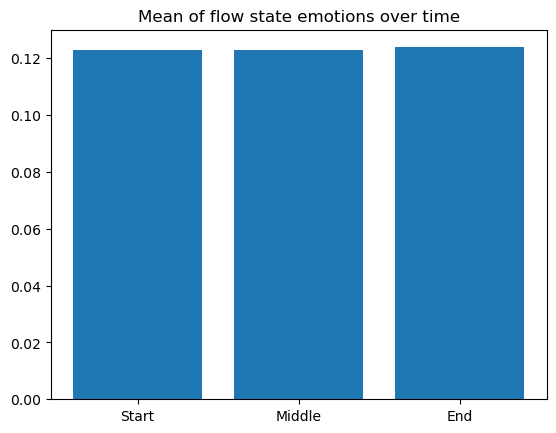

In [15]:
flow_emotions = ['joy', 'fear', 'surprise']

df_merged['flow'] = df_merged[flow_emotions].mean(axis=1)
plt.bar(['Start', 'Middle', 'End'], [df_merged[['flow', 'patch']].loc[df_merged['patch']==0].mean()['flow'], df_merged[['flow', 'patch']].loc[df_merged['patch']==1].mean()['flow'], df_merged[['flow', 'patch']].loc[df_merged['patch']==2].mean()['flow']])
plt.title('Mean of flow state emotions over time')